## Model Summary

## Linear Perceptron
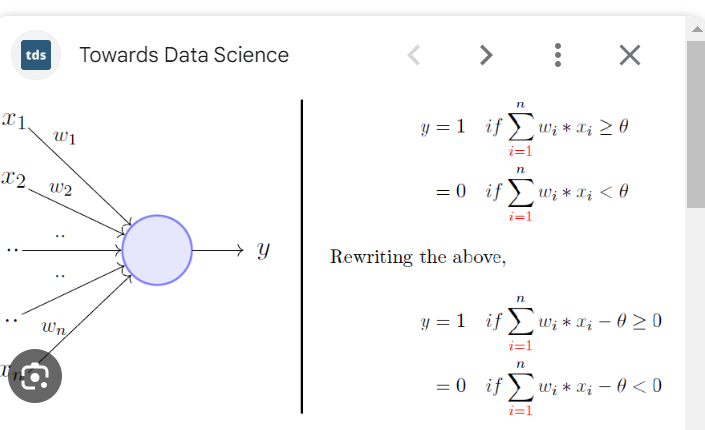

In [ ]:
import torch
import torch.nn as nn

class Perceptron(nn.Module):
    '''
    y=WT*X+b or W.X+b
    '''
    def __init__(self, input_size, output_size):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        # Forward pass without activation function
        return self.linear(x)

In [10]:
# Summary
# Create an instance of the perceptron
perceptron = Perceptron(input_size=3, output_size=1)

# You need to define input size to calcualte parameters
torchsummary.summary(perceptron.to('cuda'),batch_size=-1, input_size=(1,3))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 1]               4
Total params: 4
Trainable params: 4
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [2]:
# Tensor Board PS D:\PyTorch> tensorboard --logdir=runs
from torch.utils.tensorboard import SummaryWriter

# Create an instance of the model
perceptron = Perceptron(input_size=3, output_size=1).to('cuda')
X= torch.randn(2,1,3).to('cuda')  # batch_size*1*no_of_in_features

writer = SummaryWriter("runs/Perceptron")
writer.add_graph(perceptron, X)
writer.close()

Using TensorFlow backend.


## CNN
### Conv Rule
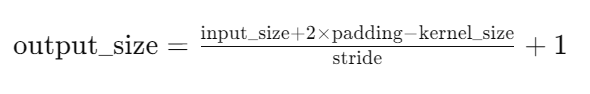

### Pool Rule
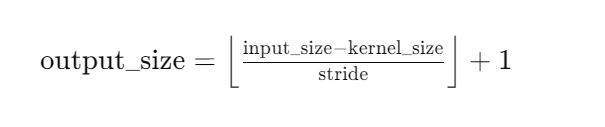

In [14]:
import torch.nn.functional as F

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet,self).__init__()
        # Conv Layers for features extractions
        # in_channel has 3 channels
        self.conv1=nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5)
        self.pool=nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv2=nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5)

        # FC layers for Classification
        # Flatten the image to be the input for the fc layer
        self.fc1=nn.Linear(in_features=16*5*5,out_features=120) 
        self.fc2=nn.Linear(in_features=120,out_features=84) 
        self.fc3=nn.Linear(in_features=84,out_features=10) #out_features are 10 as we have 10 classes 

    def forward(self,x):
        # Note: x = F.relu(x) # Activation Function (It doesn't change the Size)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))

        print(x.shape)

        # Flatten  out of layer 4 is [batch_size,16,5,5]
        x = x.view(-1,16*5*5) # [batch_size,no_features]

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

# pip install torchsummary
import torchsummary

model= ConvNet().to('cuda')

# You need to define input size to calcualte parameters
torchsummary.summary(model.to('cuda'),batch_size=4, input_size=(3, 32, 32))


print("Demo of Data Flow")
input_data = torch.randn(4,3,32, 32).to('cuda')
output=model.to('cuda')(input_data)
# Apply softmax activation
print(output.shape)

torch.Size([2, 16, 5, 5])
torch.Size([2, 400])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1             [4, 6, 28, 28]             456
         MaxPool2d-2             [4, 6, 14, 14]               0
            Conv2d-3            [4, 16, 10, 10]           2,416
         MaxPool2d-4              [4, 16, 5, 5]               0
            Linear-5                   [4, 120]          48,120
            Linear-6                    [4, 84]          10,164
            Linear-7                    [4, 10]             850
Total params: 62,006
Trainable params: 62,006
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.05
Forward/backward pass size (MB): 0.25
Params size (MB): 0.24
Estimated Total Size (MB): 0.53
----------------------------------------------------------------
Demo of Data Flow
torch.Size([4, 16, 5, 5])
torch.Size([4, 40

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the model class
class MyModel(nn.Module):
    def __init__(self,num_classes):
        super(MyModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32*224*224, 128) #32*224*224 Flattening image to 1d # 1605632
        self.fc2 = nn.Linear(128, num_classes)
    
    def forward(self, x):
        x = self.conv1(x) 
        x = nn.functional.relu(x)  # f(x)=max(0,x)
        print(x.shape)
        x = self.conv2(x)
        x = nn.functional.relu(x)
        print(x.shape)
        x = x.view(-1, 32*224*224) 
        print(x.shape)
        x = self.fc1(x)
        x = nn.functional.relu(x)
        print(x.shape)
        x = self.fc2(x)
        print(x.shape)
        return  F.softmax(x, dim=1)  # Softmax activation for output layer
        return x

# Create an instance of the model
model = MyModel(num_classes=10)

# Print the PyTorch model parameters 
print(model)


# pip install torchsummary
import torchsummary

# You need to define input size to calcualte parameters
torchsummary.summary(model.to('cuda'),batch_size=-1, input_size=(3, 224, 224))


# print("Demo of Data Flow")
# input_data = torch.randn(2,3,224, 224).to('cuda')
# out=model.to('cuda')(input_data)
# # Apply softmax activation
# output = F.softmax(out, dim=1)  # dim=1 applies softmax along the second dimension
# print(output.shape)


## Example of Linear Layer

In [28]:
import torch
import torch.nn as nn

# Define a linear layer
linear_layer = nn.Linear(in_features=10, out_features=5)

# Example with 1D tensor input
input_1d = torch.randn(1, 10)  # 1D tensor with shape (1, 10) representing a single sample
output_1d = linear_layer(input_1d)
print("Output shape with 1D tensor input:", output_1d.shape)  # Output shape: (1, 5)

# Example with 2D tensor input
input_2d = torch.randn(64, 10)  # 2D tensor with shape (64, 10) representing a batch of 64 samples
output_2d = linear_layer(input_2d)
print("Output shape with 2D tensor input:", output_2d.shape)  # Output shape: (64, 5)

Output shape with 1D tensor input: torch.Size([1, 5])
Output shape with 2D tensor input: torch.Size([64, 5])
